<h1>4. Data exploration and visualisation</h1> 
<HR WIDTH="100%" size="6">

<table align='left'>
  <tr>
    <td><b>Step</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
  <td><b>4.1 </b>Read in Data</td>
  <td>Read in data from .csv file and recode date variables as pandas datetime.</td>
  </tr>
  <tr>  
  <td><b>4.2 </b>Shape data and plot</td>
  <td>Data is shaped and aggregated to plot counts of reports by month/year.Plot of counts created using <b>matplotlib</b> and <b>seaborn</b> packages</td>
  </tr>
  <tr>  
  <td><b>4.3 </b>Time Series</td>
    <td>Standardize the date formats of columns holding date values. Allows for easier calculations. <b>dateime</b> module is used to convert dates.</td>
  </tr>
  <tr> 
  <td><b>4.4 </b> Trendlines</td>
      <td>The column <i>State/Province</i> contains geographic data about the location of the User submitting a report. Data is cleaned and a new hierarchical column, <i>Country</i> is created.</td>
  </tr>
  <tr> 
  <td><b>4.5 </b>Stacked Area Chart</td>
    <td>Using the <i>Warning:</i> column, create monthly count of records split by values (Yes,No). Plot sequential months with with perecntages split between <i>Warning:</i> equal to (Yes,No)</td>
  </tr>
  <tr> 
  <td><b>4.6 </b>Ordered Bar Chart</td>
  <td>Plot a bar chart of the count of the generated <i>Country:</i> column </td>
  </tr>
  <tr> 
  <td><b>4.7 </b> Conditional Probability</td>
  <td>Using Seaborn plot a conditional probability base based on the <i>Tested:</i> and <i>Warning:</i> columns.</td>
  </tr>
    <tr> 
    <td><b>4.8 </b>Stacked Bar Chart</td>
    <td>Based on the derived column <i>SC Category:</i> plot the % of reports where a <i>Warning:=Yes</i></td>
  </tr>
   <tr> 
   <td><b>4.9 </b>Facetted plots with <b>Seaborn</b></td>
    <td><p>Create a series of subplots of the <i>User Report</i> column's string length using Seaborn. <b>displot,boxplot,violinplot</b> used to display the data. </p></td>
  </tr>
      </table><br clear="left"/>

  <table align='left'>
   <tr>
   <th colspan="4"><p style="text-align: center;">Packages Used</p></th>
  </tr>
  <tr style="background-color:azure">
    <td>Package</td>
    <td>Pre-installed with Anaconda</td>
    <td>Install instruction from command line</td>
    <td>Documentation Link</td>
    </tr>
    <tr>
    <td>pandas</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://pandas.pydata.org/</td>
   </tr>
   <tr>
   <td>numpy</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://www.numpy.org/</td>
   </tr>
   <tr>
    <td>matplotlib</td>
    <td><p style="text-align: center;">&#10004;</p></td>
    <td></td>
    <td>http://matplotlib.org/index.html</td>
    </tr>
    <tr>
    <td>seaborn</td>
    <td><p style="text-align: center;">&#x2718;</p></td>
    <td>pip install seaborn</td>
    <td>http://stanford.edu/~mwaskom/software/seaborn/</td>
    </tr>
    </table><br clear="left"/>


<h3>Note:</h3>

<p>There are further visualisations in notebooks <b>5.Classificaiton</b> and <b>6.Clustering</b> to convey results of analysis.


<HR WIDTH="100%" size="6">

<h3>4.1 Read in data</h3>

In [33]:
import pandas as pd
df=pd.read_csv("Data/prReports.csv",encoding='utf-8') 

# Recode columns with date values to pandas datetime series  
df['Date Submitted:']=pd.to_datetime(df['Date Submitted:'])
df['Last Updated:']=pd.to_datetime(df['Last Updated:'])
df['Member Since:']=pd.to_datetime(df['Member Since:'])
df.shape


(5001, 37)

<h3>4.2 Data shaping and aggregate for plotting</h3>


In [34]:
#Create a new data frame and extract the year and week that a report is submitted. 
dfRecords=pd.DataFrame()
dfRecords['ID']=df['ID:']

#Extract the year and week of report submission
dfRecords['Year']=(df['Date Submitted:']).map(lambda x: x.year)
dfRecords['Week']=(df['Date Submitted:']).map(lambda x: x.week)

dfWeekYear = dfRecords.pivot_table(index='Week', columns='Year',values="ID",aggfunc=len)
dfWeekYear.head()

Year,2011,2012,2013,2014
Week,,,,
1,NaN,58,37,22
2,NaN,19,23,15
3,NaN,35,20,25
4,NaN,36,22,16
5,NaN,49,18,24


In [35]:
dfWeekYear.describe()

,2011,2012,2013,2014
count,21.000000,52.000000,52.000000,47.000000
mean,41.523810,34.788462,26.076923,20.510638
std,8.429822,11.335069,7.548136,6.507094
min,24.000000,13.000000,13.000000,3.000000
25%,37.000000,27.750000,20.750000,16.000000
50%,41.000000,32.500000,26.000000,19.000000
75%,48.000000,43.250000,29.000000,25.500000
max,59.000000,62.000000,48.000000,35.000000


<h3> 4.3 Time Series Counts </h3>

This method uses a subplot of matplotlib. There are many ways of achieving this. Matplotlib applies all commands on the current plot until a new plot is generated. 

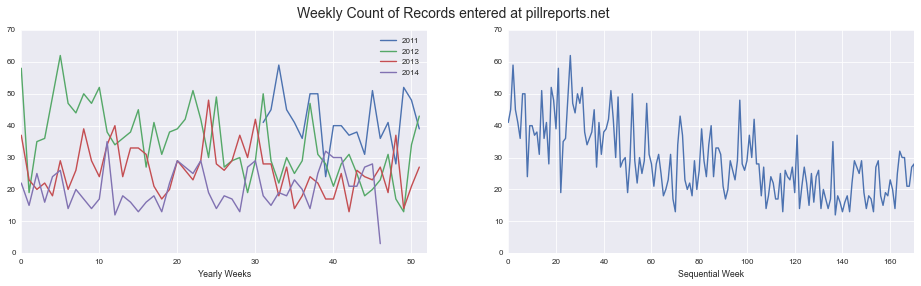

In [36]:
#Set up matplot so that plots are displayed in the browser. 
%matplotlib inline 

import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")


plt.figure(1,figsize=(16,4))  #First figure, figsize = ()
plt.suptitle("Weekly Count of Records entered at pillreports.net", fontsize=14)   #Give the overall plot a title

with sns.axes_style("darkgrid"):
    plt.subplot(121)   #Specify plots
    plt.plot(dfWeekYear)#
    plt.xlim(0,52)  #  By default matplotlib pads out plots. Limit the x axis to 0-52 weeks.
    plt.xlabel('Yearly Weeks')#Add a title to the first axis.
    plt.legend([2011,2012,2013,2014])


#Swap the order
dfYearWeek = dfRecords.pivot_table(index='Year', columns='Week',values="ID",aggfunc=len)
dfYearWeek = dfYearWeek.stack()

with sns.axes_style("darkgrid"):
    plt.subplot(122) #Move the point to the second plot
    plt.plot(dfYearWeek)
    plt.xlabel('Sequential Week')
    plt.xlim(0,170)
#End of the figure. 

#Uncomment to save the figure
#plt.savefig('Images/img4_3.png',dpi=96,bbox_inches='tight')

<h3>4.4 Trendline </h3>
<p> A Seaborn <b>lmplot</b> is used to plot the trend of number of records over time </p>

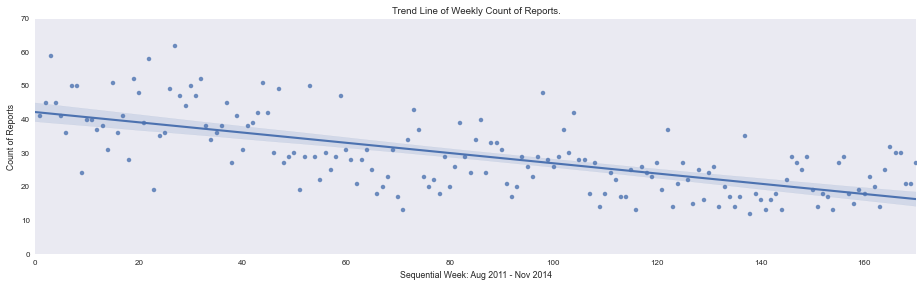

In [37]:
dfYearWeek=dfYearWeek.reset_index()
dfYearWeek.rename(columns={0:'Count'}, inplace=True)
dfYearWeek['Sequence']=(dfYearWeek.index).values+1

#Use seaborn to plot a scatter plot of count of records by week with a trend line.
sns.lmplot('Sequence','Count',dfYearWeek,size=4,aspect=3.25, legend =True)
plt.xlim(0,170)
plt.title("Trend Line of Weekly Count of Reports.")
plt.xlabel("Sequential Week: Aug 2011 - Nov 2014")
plt.ylabel("Count of Reports")

#Clean up
del(dfWeekYear,dfYearWeek)


#Uncomment to save the figure
#plt.savefig('Images/img4_4.png',dpi=96,bbox_inches='tight')

<h3>4.5 Stacked Area <i>Warning:</i></h3>

<p> Using the <i>Warning:</i> column, create count of records split by values (Yes,No). Create an empty list y and pass the two lists as arrays. Calculate the percentange difference between the two counts. Using matplotlib's <b>mpatches</b> create legend by drawing rectangles.</p>

In [38]:
dfRecords=pd.DataFrame()
dfRecords['ID']=df['ID:']

#Extract the year and month of report submission
dfRecords['Year']=(df['Date Submitted:']).map(lambda x: x.year)
dfRecords['Month']=(df['Date Submitted:']).map(lambda x: x.month)
dfRecords['Warning']=df['Warning:']

#Create a pivot table
dfWeekYear = dfRecords.pivot_table(index=['Year','Month'],columns='Warning',aggfunc=len)

#Create empty list and add the two columns as arrays. 
y=[]
y.append(dfWeekYear['ID','no'].values)
y.append(dfWeekYear['ID','yes'].values)
percent = y/(y[0]+y[1]).astype(float)*100

#Create a sequential array for plotting
x = np.arange(len(dfWeekYear))

Plots

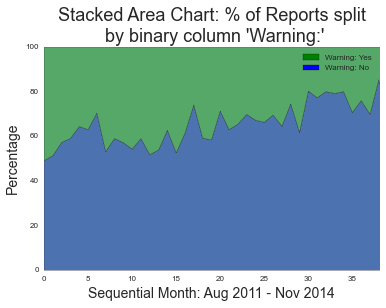

In [39]:
plt.stackplot(x, percent)
plt.xlim(0,38)
plt.title("Stacked Area Chart: % of Reports split \n by binary column 'Warning:'",fontsize=18)
plt.xlabel("Sequential Month: Aug 2011 - Nov 2014",fontsize=14)
plt.ylabel("Percentage",fontsize=14)


#For the Legend in Stackplot. Create rectangles and pass to legend object.
import matplotlib.patches as mpatches
p1 = mpatches.Rectangle((0, 0), 1, 1, fc="green")
p2 = mpatches.Rectangle((0, 0), 1, 1, fc="blue")
plt.legend([p1, p2], ['Warning: Yes','Warning: No'])

#Cleanup
del(x,y,p1,p2,percent,dfWeekYear)

#Uncomment to save the figure
#plt.savefig('Images/img4_5.png',dpi=96,bbox_inches='tight')

<h3>4.6 Ordered Bar Chart</h3>

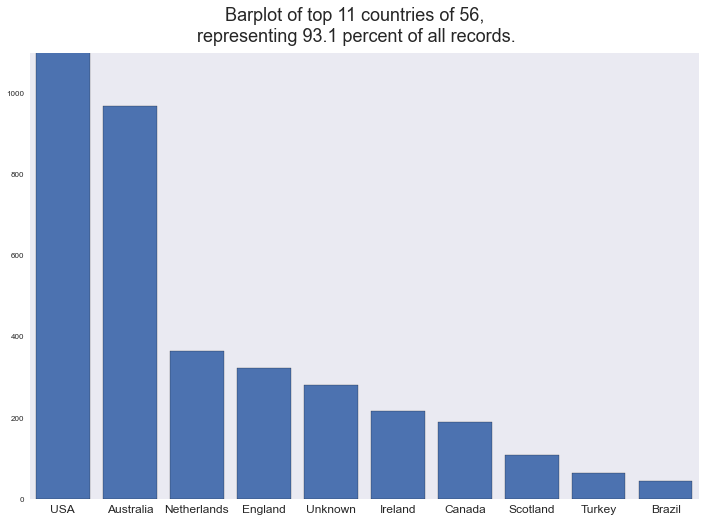

In [40]:
#Create a count of the Countries acoss the dataframe using a groupby and aggregator. 
dfRecords=df['ID:'].groupby(df['Country:']).agg(['count'])
dfRecords=dfRecords.reset_index()
dfRecords=dfRecords.sort('count', ascending=False)

#Number of countries to plot
toplot=11
#Calculate how many records this representns
percent=sum(dfRecords['count'][0:toplot])/sum(dfRecords['count']).astype(float)*100

#Set variables for plot. 
x=np.arange(toplot)
y=dfRecords['count'][0:toplot]
labels=dfRecords['Country:'][0:toplot].values

#Create the plot size and title
plt.figure(1,figsize=(12,8))  #First figure, figsize = ()
plt.suptitle(("Barplot of top %0.0f countries of %0.0f,\n representing %0.1f percent of all records."
              % (toplot,len(dfRecords),percent)), fontsize=18)   #Give the overall plot a title

#Create bar plot and add labels. 
plt.bar(x,y,align='center')
plt.xticks(x, labels, rotation='horizontal',fontsize=12)
plt.xlim(-0.5,9.5)
plt.ylim(0,1100)

#Clean up
del(dfRecords,toplot,percent,x,y,labels)

#Uncomment to save the figure
#plt.savefig('Images/img4_6.png',dpi=96,bbox_inches='tight')

<h3>4.7 Conditional Probability</h3>

<p> A Seaborn <b>lfactorplot</b> is used to plot the conditional probability of <i>Tested vs. Warning</i></p>

/Users/briancarter1/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


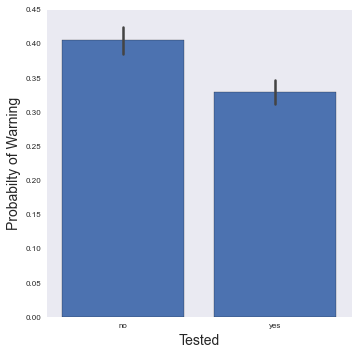

In [41]:
#Create temporary data frame. Set the a label to 0 if Warning: = no else 1.
dfTemp=df[['Warning:','Tested:']]
dfTemp['Label:']=0
dfTemp.loc[dfTemp['Warning:']=='yes','Label:'] = 1

#Using seaborn create a probability of Warning if 
g=sns.factorplot("Tested:","Label:",data=dfTemp, kind="bar")
g.set_xlabels("Tested",fontsize=14)
g.set_ylabels("Probabilty of Warning",fontsize=14)
g.set_xlabels("Tested",fontsize=14)

#Clean up
del(dfTemp)

#Uncomment to save the figure
#plt.savefig('Images/img4_7.png',dpi=96,bbox_inches='tight')

<h3>4.8 Stacked Bar </h3>

<p>Based on the derived column <i>SC Category:</i> plot the % of reports where a Warning:=Yes<p>

In [42]:
#Creata a new datrame and copy across variables of interest
dfRecords=pd.DataFrame()
dfRecords['ID']=df['ID:']
dfRecords['SC Category']=df['SC Category:']
dfRecords['Warning']=df['Warning:']

#Create a pivot table, reset the index and print out results
dfCat=dfRecords.pivot_table(index='SC Category',columns='Warning',aggfunc=len)
dfCat=dfCat.reset_index()
dfCat

SC Category    ID     
Warning                no  yes
0            amphet   107  397
1              mdxx  2809   50
2             other    34  287
3               pip     3  276
4           unknown   231  807

<p>Similar to the Stacked Chart create a list and pass arrays with values and calculate percentages. Overlay two bar charts on top of each other, the first with percentages set to 100% and the second with the percentage of <i>Warning:=Yes</i> to simulate a stacked bar. 

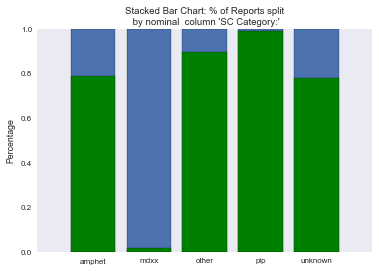

In [43]:
#Similar to the Stacked chart, create list and calculate percentages. 
y=[]
y.append(dfCat['ID','no'].values)
y.append(dfCat['ID','yes'].values)
x = np.arange(len(dfCat))
#Percent of yes over (yes+no)
percent = y[1]/(y[0]+y[1]).astype(float)

#Plot the percent against 100%
plt.bar(x,[1,1,1,1,1],align='center')
plt.bar(x,percent,color='green',align='center')

#Add title, x-axis,y-axis names and labels
plt.title("Stacked Bar Chart: % of Reports split \n by nominal  column 'SC Category:'")
plt.ylabel("Percentage")

labels=dfCat['SC Category'].values
plt.xticks(x, labels, rotation='horizontal')

#Clean up
del(dfRecords,dfCat,y,x,labels)

#Uncomment to save the figure
#plt.savefig('Images/img4_8.png',dpi=96,bbox_inches='tight')


<h3>4.9 Facetted plots with Seaborn </h3>

<p>Create a series of subplot of the <i>User Report</i> column's string length. Seaborn <b>displot,boxplot,violinplot</b> used to display the data. </p>

<p><font size="2" color="blue">The analysis will focus on rows that are written in English and are not Admin/Moderator Reports. Remove these as visualisastion focuses on the distribution in length of reports </p>

In [44]:
#This will be rmove carried out in Data Cleansing. 
#df['Desc Length:']=df['Description:'].apply(lambda d: len(d) if not pd.isnull(d) else 0)
df=(df[(df['Language:']=='en')&(df['Language Percentage:']>=0.99)&(df['User Admin:']==False)])


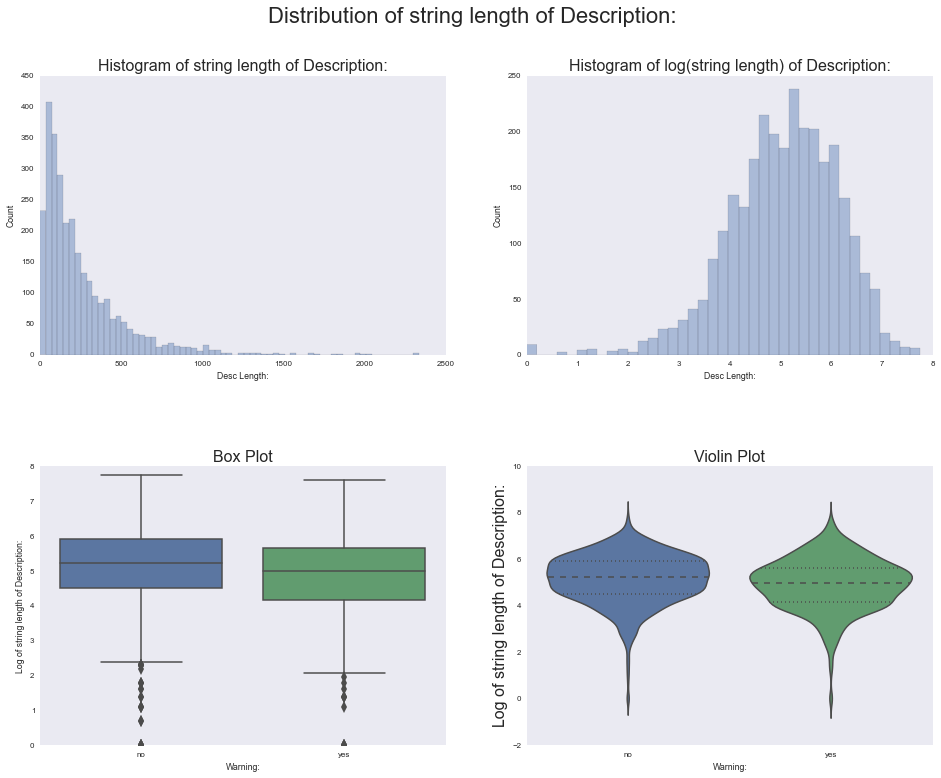

In [45]:



f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16, 12))
f.suptitle("Distribution of string length of Description:", fontsize=22)

#Defaults
#left  = 0.125  # the left side of the subplots of the figure
#right = 0.9    # the right side of the subplots of the figure
#bottom = 0.1   # the bottom of the subplots of the figure
#top = 0.9      # the top of the subplots of the figure
#wspace = 0.2   # the amount of width reserved for blank space between subplots
#hspace = 0.5   # the amount of height reserved for white space between subplots
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

sns.distplot(df['Desc Length:'], kde=False,ax=ax1)
ax1.set_title("Histogram of string length of Description:", fontsize=16)
ax1.set_ylabel("Count")

sns.distplot((np.log(df['Desc Length:'])), kde=False,ax=ax2)
ax2.set_title("Histogram of log(string length) of Description:", fontsize=16)
ax2.set_ylabel("Count")

sns.boxplot(np.log(df['Desc Length:']), groupby=df[('Warning:')],fliersize=8, ax=ax3)
ax3.set_title("Box Plot", fontsize=16)
ax3.set_ylabel("Log of string length of Description:")
sns.violinplot(np.log(df['Desc Length:']),groupby=df['Warning:'],ax=ax4)
ax4.set_title("Violin Plot", fontsize=16)
ax4.set_ylabel("Log of string length of Description:", fontsize=16)



#Uncomment to save the figure
#f.savefig('Images/img4_9.png',dpi=96,bbox_inches='tight')